<a href="https://colab.research.google.com/github/forymiss147/TienDung/blob/main/2151260838.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Kết nối Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pykalman


In [ ]:
2151260838%3


1

In [ ]:
path = "/content/drive/MyDrive/ktra/ktra1/data-kiem-tra-1.csv"



In [ ]:
data = pd.read_csv(path)

In [ ]:
print(data.head())

         date  truong_1  truong_2  truong_3  truong_4  truong_5
0  02.01.2013         0        59     22154    999.00         1
1  03.01.2013         0        25      2552    899.00         1
2  05.01.2013         0        25      2552    899.00        -1
3  06.01.2013         0        25      2554   1709.05         1
4  15.01.2013         0        25      2555   1099.00         1


In [ ]:
# Chuyển cột 'date' sang định dạng datetime
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')

In [ ]:
# Hiển thị dữ liệu sau khi chuyển đổi
print("\nDữ liệu sau khi chuyển đổi cột 'date':")
print(data.head())


Dữ liệu sau khi chuyển đổi cột 'date':
        date  truong_1  truong_2  truong_3  truong_4  truong_5
0 2013-01-02         0        59     22154    999.00         1
1 2013-01-03         0        25      2552    899.00         1
2 2013-01-05         0        25      2552    899.00        -1
3 2013-01-06         0        25      2554   1709.05         1
4 2013-01-15         0        25      2555   1099.00         1


In [ ]:
# Khám phá dữ liệu
print("\nThông tin tổng quan về dữ liệu:")
print(data.info())


Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481822 entries, 0 to 481821
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      481822 non-null  datetime64[ns]
 1   truong_1  481822 non-null  int64         
 2   truong_2  481822 non-null  int64         
 3   truong_3  481822 non-null  int64         
 4   truong_4  481822 non-null  float64       
 5   truong_5  481822 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 22.1 MB
None


In [ ]:
print("\nThống kê mô tả của dữ liệu:")
print(data.describe())



Thống kê mô tả của dữ liệu:
                                date       truong_1       truong_2  \
count                         481822  481822.000000  481822.000000   
mean   2013-03-06 04:05:34.131692032       1.664279      31.189028   
min              2013-01-01 00:00:00       0.000000       0.000000   
25%              2013-02-02 00:00:00       1.000000      22.000000   
50%              2013-03-05 00:00:00       2.000000      29.000000   
75%              2013-04-06 00:00:00       3.000000      44.000000   
max              2013-05-31 00:00:00       4.000000      59.000000   
std                              NaN       1.271877      15.804208   

            truong_3       truong_4       truong_5  
count  481822.000000  481822.000000  481822.000000  
mean    10117.416973     685.990926       1.169633  
min        12.000000       3.000000      -6.000000  
25%      4474.000000     203.000000       1.000000  
50%      9348.000000     399.000000       1.000000  
75%     15256.000000  

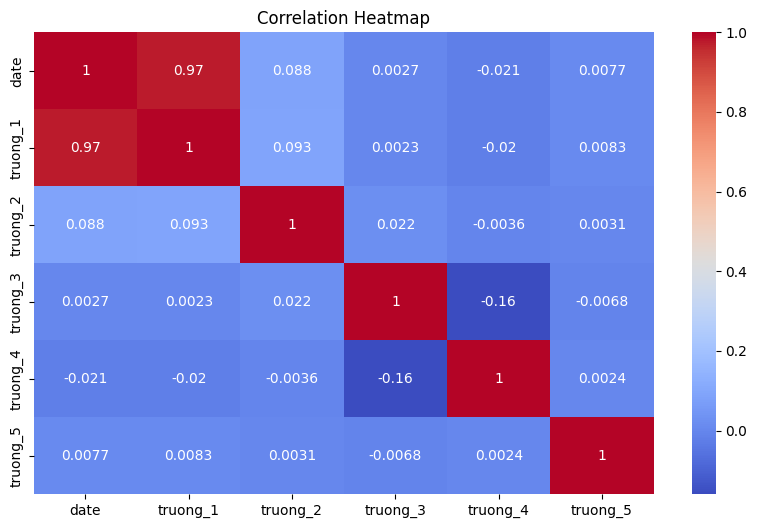

In [ ]:
# Trực quan hóa dữ liệu
# Heatmap của ma trận tương quan
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

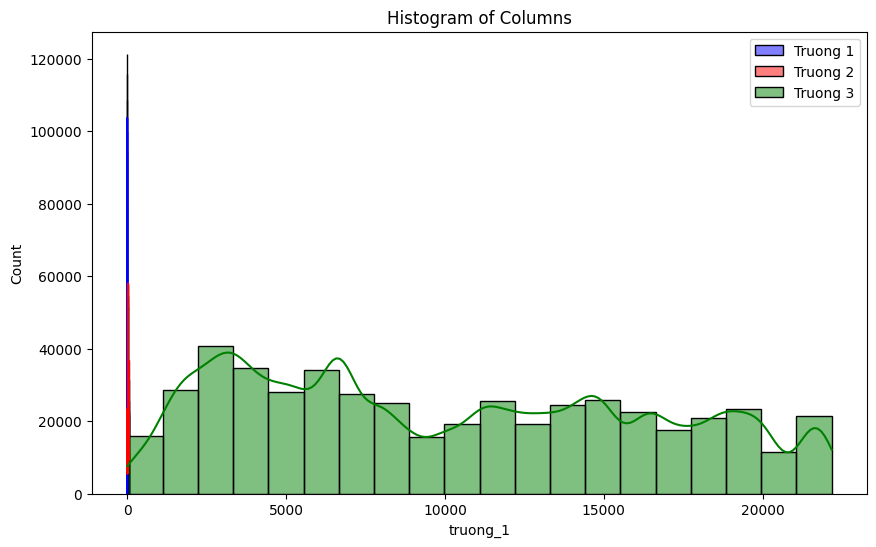

In [ ]:
# Histogram của mỗi cột
plt.figure(figsize=(10, 6))
sns.histplot(data['truong_1'], bins=20, kde=True, color='blue', label='Truong 1')
sns.histplot(data['truong_2'], bins=20, kde=True, color='red', label='Truong 2')
sns.histplot(data['truong_3'], bins=20, kde=True, color='green', label='Truong 3')
plt.title('Histogram of Columns')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


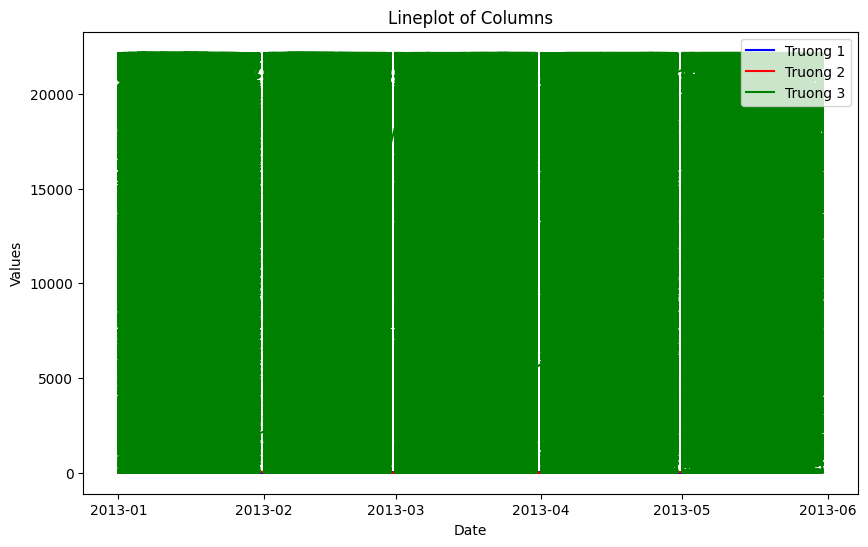

In [ ]:
# Trực quan hóa biểu đồ đường
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['truong_1'], label='Truong 1', color='blue')
plt.plot(data['date'], data['truong_2'], label='Truong 2', color='red')
plt.plot(data['date'], data['truong_3'], label='Truong 3', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Lineplot of Columns')
plt.legend()
plt.show()

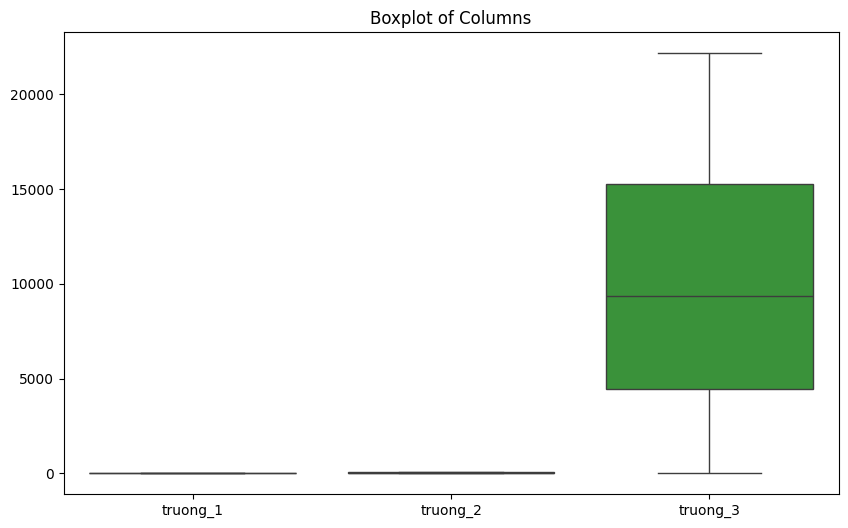

In [ ]:
# Boxplot của mỗi cột
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['truong_1', 'truong_2', 'truong_3']])
plt.title('Boxplot of Columns')
plt.show()

In [ ]:
###RNN&LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Gộp các cột 'truong_' thành một cột duy nhất
data['total_truong'] = data[['truong_1', 'truong_2', 'truong_3']].sum(axis=1)

In [ ]:
# Chia dữ liệu thành features và target
X = data['total_truong'].values.reshape(-1, 1)  # Dữ liệu features chỉ có một cột
y = data['truong_4'].values  # Thay 'truong_4' bằng tên cột bạn muốn dự đoán

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Reshape dữ liệu cho LSTM (số mẫu, số time steps, số features)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [ ]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print('MSE on test set:', loss)

MSE on test set: 1344572.125


3012/3012 [==============================] - 7s 2ms/step


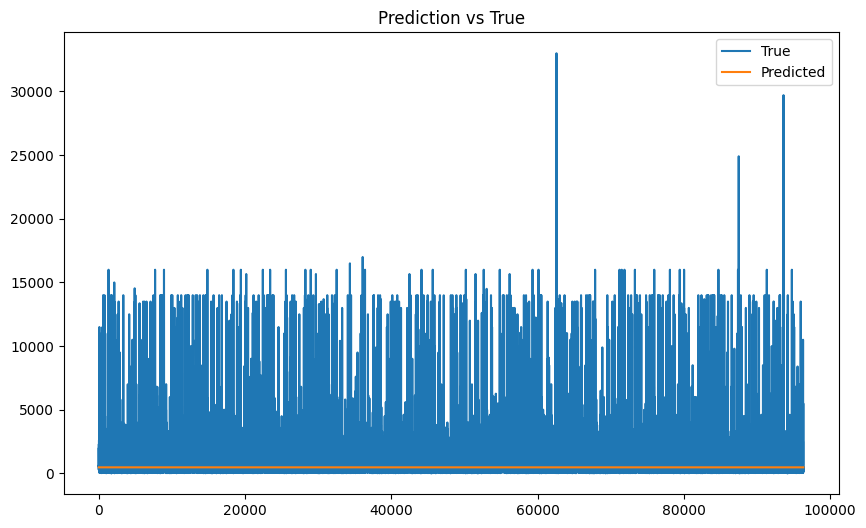

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_reshaped)

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('Prediction vs True')
plt.legend()
plt.show()